# First, set up the environment
(This only has to be done if there is no gdrive or Data_colab visable in the Files menu)

start timer

In [0]:
import timeit

start = timeit.default_timer()

1) Mount the google drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


2) copy the train data to the Data_colab map or copy the whole data map

In [0]:
#!cp -r '/content/gdrive/My Drive/data/Train/' Data_colab/Train
print('Start downloading data ')
#!cp -r -u '/content/gdrive/My Drive/data/' Data_colab
!cp -r -u '/content/gdrive/My Drive/data/Test.zip' zipped_data.zip
print('Done downloading data ')
print('Start extracting data')
!unzip -qq -o zipped_data.zip -d Data_colab
print('Done with extracting data')

Start downloading data 
Done downloading data 
Start extracting data
warning [zipped_data.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [zipped_data.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #279235).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
Done with extracting data


3) Change the executing location of the current python file

In [0]:
cd /content/gdrive/My Drive/Deep_learning

/content/gdrive/My Drive/Deep_learning


#Seccond, Run the neural network

2019.05.19-11:22:49 Initialize the logger
2019.05.19-11:22:49 Create logs folder logs
2019.05.19-11:22:49 Create log file logs/2019-05-19_11_22_49_log0.html
2019.05.19-11:22:49 Read config file config.txt
2019.05.19-11:22:49 Create models folder models
2019.05.19-11:22:49 Create output folder output
2019.05.19-11:22:49 Create data folder /content/Data_colab/
/content/Data_colab/


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 42/42 [00:05<00:00,  7.24it/s]

[2019.05.19-11:23:25] Param to optimize features.0.weight


[2019.05.19-11:23:25] Param to optimize features.0.bias
[2019.05.19-11:23:25] Param to optimize features.2.weight
[2019.05.19-11:23:25] Param to optimize features.2.bias
[2019.05.19-11:23:25] Param to optimize features.5.weight
[2019.05.19-11:23:25] Param to optimize features.5.bias
[2019.05.19-11:23:25] Param to optimize features.7.weight
[2019.05.19-11:23:25] Param to optimize features.7.bias
[2019.05.19-11:23:25] Param to optimize features.10.weight
[2019.05.19-11:23:25] Param to optimize features.10.bias
[2019.05.19-11:23:25] Param to optimize features.12.weight
[2019.05.19-11:23:25] Param to optimize features.12.bias
[2019.05.19-11:23:25] Param to optimize features.14.weight
[2019.05.19-11:23:25] Param to optimize features.14.bias
[2019.05.19-11:23:25] Param to optimize features.17.weight
[2019.05.19-11:23:25] Param to optimize features.17.bias
[2019.05.19-11:23:25] Param to optimize features.19.weight
[2019.05.19-11:23:25] Param to optimize features.19.bias
[2019.05.19-11:23:25] 

Epoch no 0/2:   0%|          | 0/2 [00:00<?, ?it/s]

[2019.05.19-11:23:25] Start epoch no 1
[2019.05.19-11:23:56] Train loss at epoch 1: 2.7368651319557107
[2019.05.19-11:23:56] Train accuracy at epoch 1: 0.24043715846994534
[2019.05.19-11:23:59] Validation loss at epoch 1: 1.6989219219685416
[2019.05.19-11:23:59] Validation accuracy at epoch 1: 0.46630174478275743
[2019.05.19-11:23:59] Save model at epoch 1
[2019.05.19-11:24:02] Done saving model [3.27s]
[2019.05.19-11:24:02] Finish epoch no 1 in 36.71s


Epoch no 1/2: 100%|██████████| 2/2 [00:36<00:00, 18.36s/it]

[2019.05.19-11:24:02] Start epoch no 2
[2019.05.19-11:24:33] Train loss at epoch 2: 1.6156683215318166
[2019.05.19-11:24:33] Train accuracy at epoch 2: 0.4795459348488965
[2019.05.19-11:24:36] Validation loss at epoch 2: 1.1407113281619332
[2019.05.19-11:24:36] Validation accuracy at epoch 2: 0.620253164556962
[2019.05.19-11:24:36] Finish epoch no 2 in 33.64s
[2019.05.19-11:24:41] Save best model
[2019.05.19-11:24:43] Done saving model [2.56s]


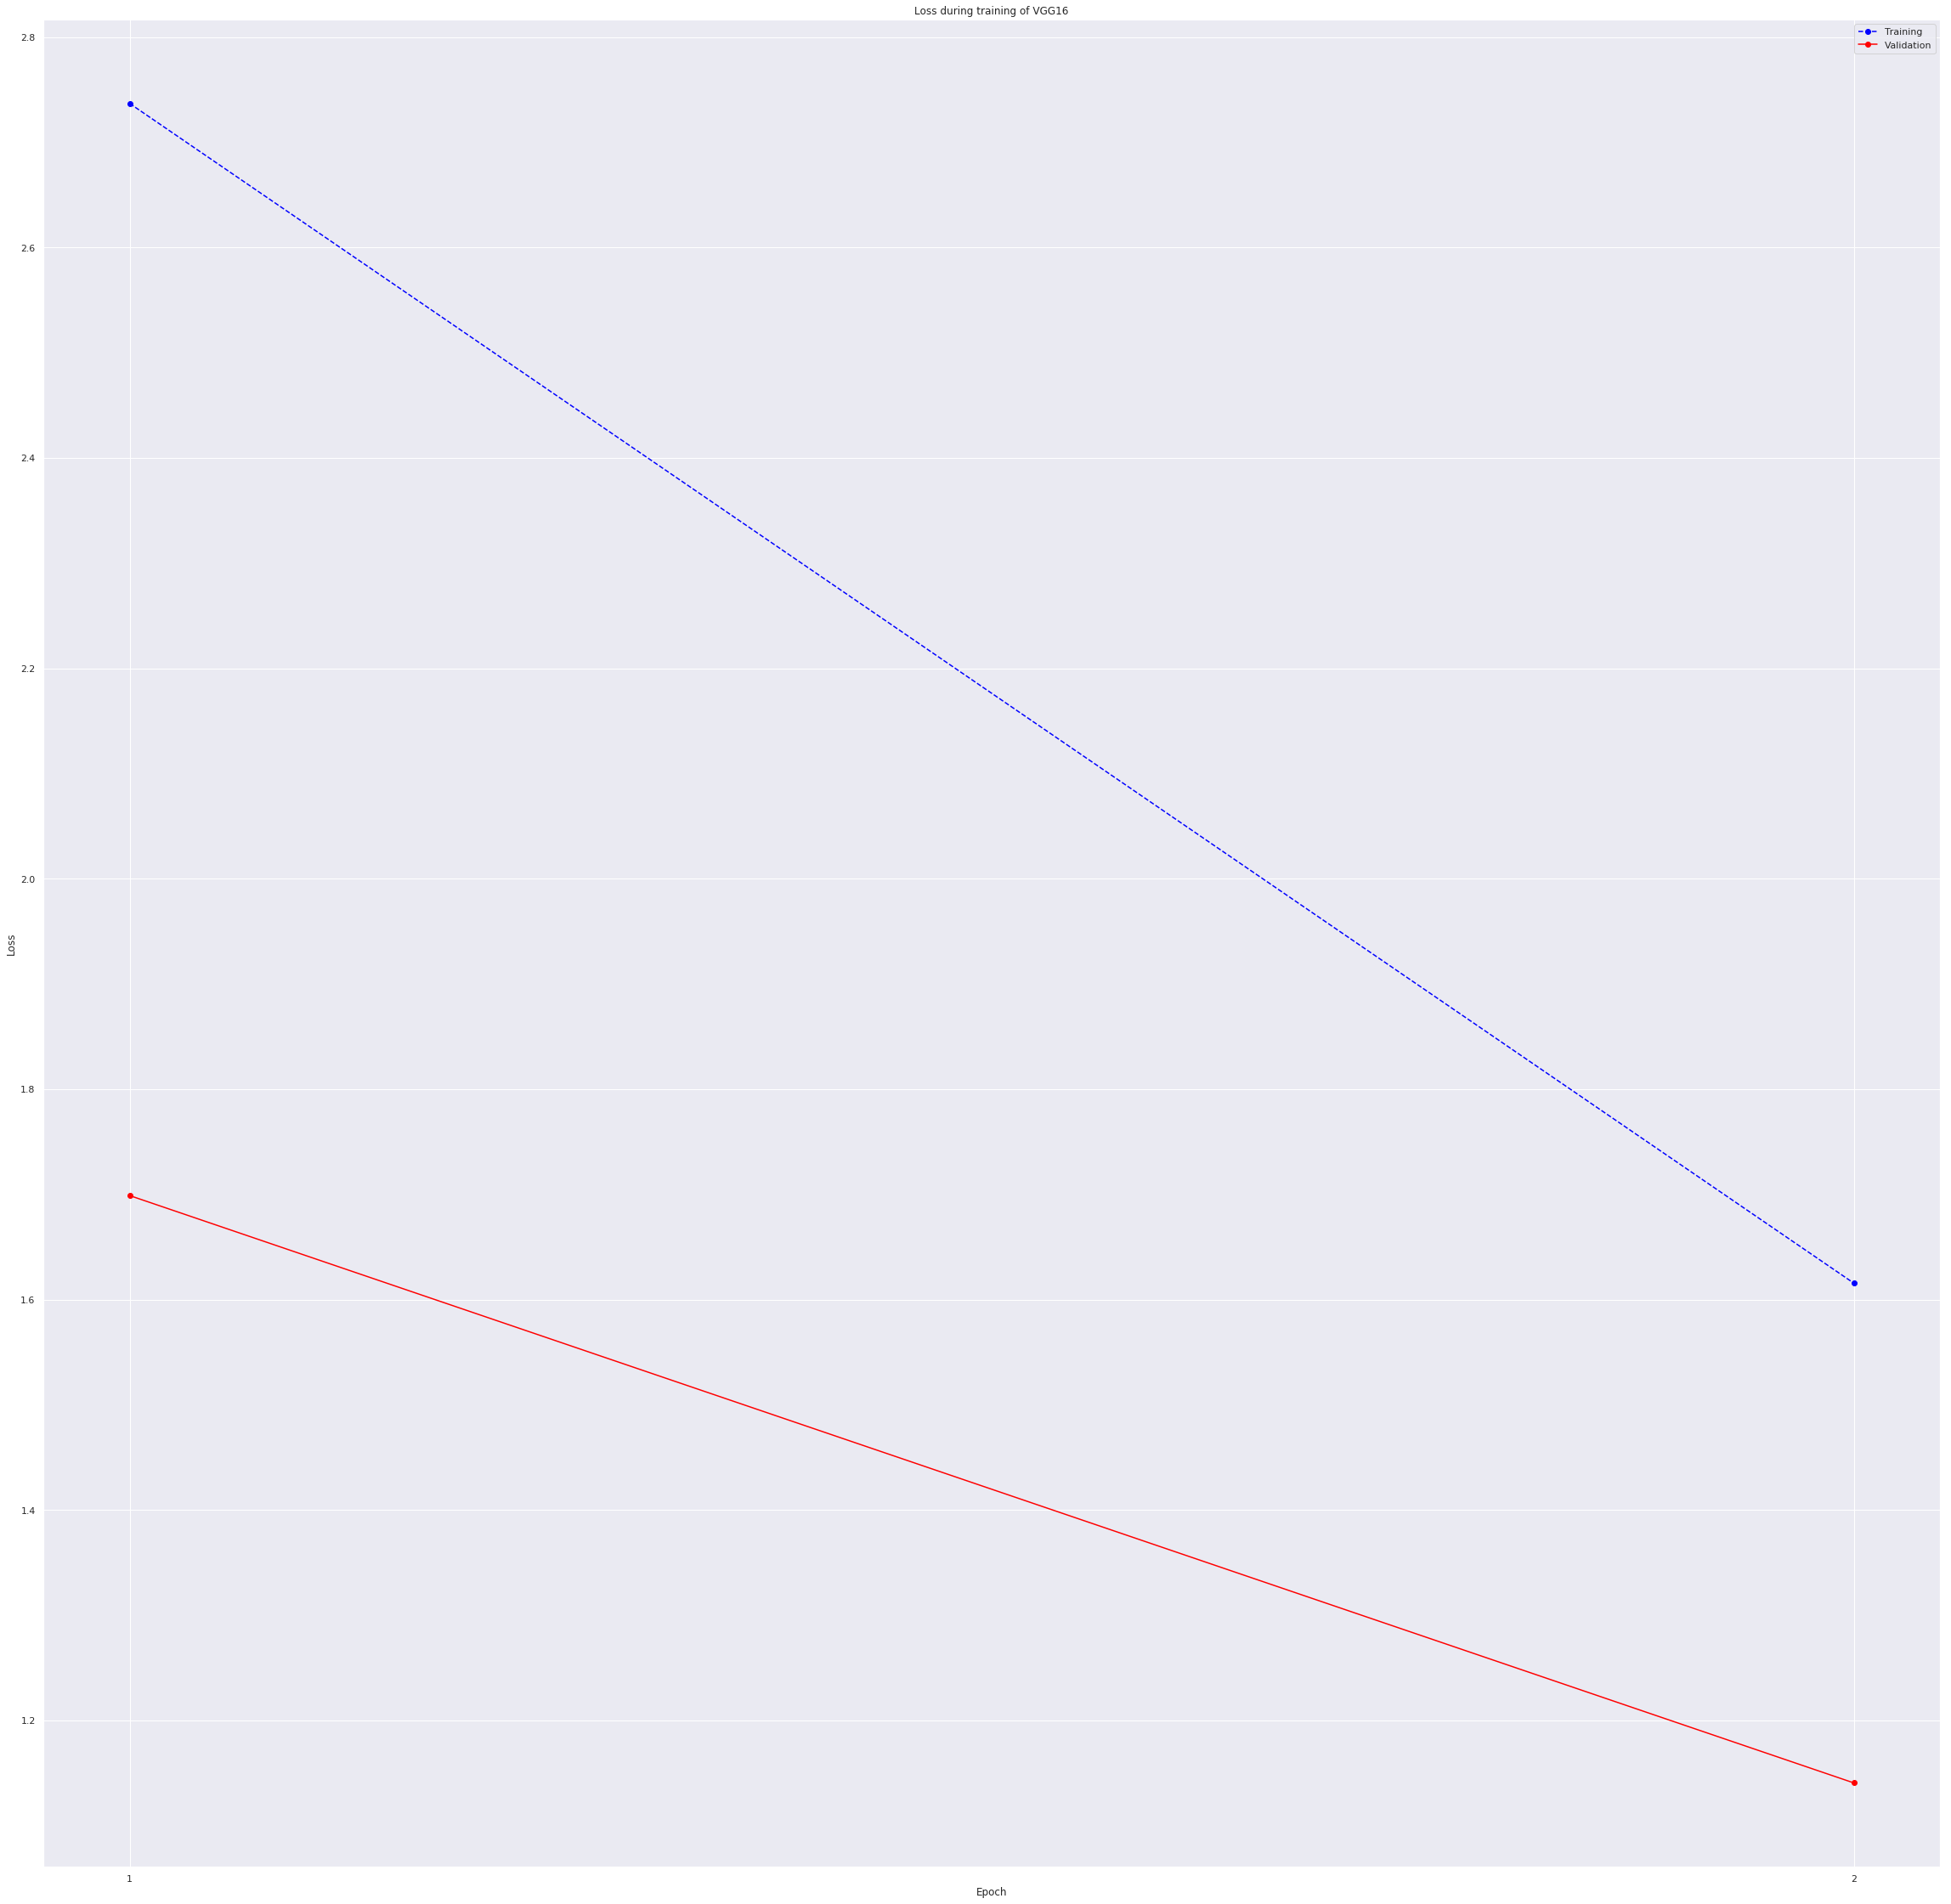

In [0]:
from utils import get_drive_path
from logger import Logger

from tqdm import tqdm, trange
import inspect

import torchvision.models as models
from torchvision import transforms
import torch.optim as optim


import torch.nn as nn
import torch

from model_utils import set_parameter_requires_grad

import os
import cv2
import copy
import time


from sklearn.model_selection import train_test_split
from image_dataset import ImageDataset

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

import pickle as pkl

def plot_loss_history(plt_title, filename, training_list, validation_list, logger):

  fig = plt.figure(figsize=(40, 40))
  sns.set()

  tmstp = logger.get_time_prefix()
  with open(logger.get_output_file("train_loss_" + tmstp + ".pkl"), 'wb') as fp:
    pkl.dump(training_list, fp)
  with open(logger.get_output_file("valid_loss_" + tmstp + ".pkl"), 'wb') as fp:
    pkl.dump(validation_list, fp)

  x = np.array(range(len(training_list)))
  plt.title(plt_title)
  plt.plot(x, training_list, linestyle='--', marker = 'o', color='blue', label = 'Training')
  plt.plot(x, validation_list, linestyle='-', marker = 'o', color='red', label = 'Validation')
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.xticks(x, range(1, len(training_list) + 1))

  plt.legend(loc = 'upper right')

  plt.savefig(logger.get_output_file(filename), dpi = 120, 
    bbox_inches='tight')
  
def read_data(logger):

  data = []
  labels = []
  for i in tqdm(range(int(logger.config_dict['NUM_CLASSES']))):
    directory = '/content/Data_colab/Train/' + str(i)
    #directory = '/content/gdrive/My Drive/data/Train/' + str(i) 
    #directory = os.fsencode(os.path.join(logger.data_folder, "Train", str(i)))

    for file in os.listdir(directory):
      filename = os.fsdecode(file)
      if filename.endswith(".png"):
        data.append(cv2.imread(logger.get_data_file(filename, os.path.join(
          "Train", str(i)))))
        labels.append(i)

  return data, labels


def train_model(logger, model, dataloaders, criterion, optimizer, 
  num_epochs = 1, save_after_epochs = 1):

  old_print = print
  inspect.builtins.print = tqdm.write
  t = trange(num_epochs, desc='Epoch bar', leave=True)

  validation_acc_list  = []
  validation_loss_list = []
  training_loss_list   = []
  best_acc = 0
  for epoch in range(num_epochs):
    start_time = time.time()
    t.set_description("Epoch no {}/{}".format(epoch, num_epochs))
    t.refresh()
    t.update(1)

    inspect.builtins.print = old_print

    logger.log("Start epoch no {}".format(epoch + 1))

    for phase in ['train', 'valid']:

      if phase == "train":
        model.train()
      else:
        model.eval()

      epoch_loss = 0
      epoch_corrects = 0
      
      for dataset in dataloaders[phase]: # fixed here
        inputs = dataset["image"]
        labels = dataset["label"]
        inputs_pt = inputs.to(device)
        labels_pt = labels.to(device)

        optimizer.zero_grad()

        with torch.set_grad_enabled(phase == "train"):
          outputs_pt = model(inputs_pt)
          loss_pt = criterion(outputs_pt, labels_pt)

          _, preds = torch.max(outputs_pt, dim = 1)

          if phase == "train":
            loss_pt.backward()
            optimizer.step()

        epoch_loss      += loss_pt.item() * inputs_pt.size(0)
        epoch_corrects  += torch.sum(preds == labels_pt.data)

      epoch_loss /= len(dataloaders[phase].dataset) 
      epoch_acc  = epoch_corrects.double() / len(dataloaders[phase].dataset)

      logger.log("{} loss at epoch {}: {}".format(
        "Train" if phase == "train" else "Validation", epoch + 1, epoch_loss))
      logger.log("{} accuracy at epoch {}: {}".format(
        "Train" if phase == "train" else "Validation", epoch + 1, epoch_acc))

      if phase == "valid" and epoch_acc > best_acc:
        best_acc   = epoch_acc
        best_epoch = epoch
        best_model = copy.deepcopy(model.state_dict())

      if phase == "valid":
        if epoch % save_after_epochs == 0:
          logger.log("Save model at epoch {}".format(epoch + 1))
          model_path = "VGG16_E" + str(epoch + 1) + "_L" + "{:.2f}".format(epoch_acc) + "_" + logger.get_time_prefix()
          model_path += ".ptm"
          torch.save(model, logger.get_model_file(model_path))
          logger.log("Done saving model", show_time = True)
        validation_acc_list.append(epoch_acc) 
        validation_loss_list.append(epoch_loss)
      else:
        training_loss_list.append(epoch_loss)

    logger.log("Finish epoch no {} in {:.2f}s".format(epoch + 1, time.time() - start_time))

  plot_loss_history("Loss during training of VGG16", "loss_plot_" + logger.get_time_prefix(), training_loss_list, validation_loss_list, logger)
  logger.log("Save best model")
  model_path = "VGG16_BEST" + "_E" + str(epoch + 1) + "_" + logger.get_time_prefix()
  model_path += ".ptm"
  best_model_path=model_path
  #global path_to_best_trained_network=model_path
  torch.save(best_model, logger.get_model_file(model_path))
  logger.log("Done saving model", show_time = True)

  return model.load_state_dict(best_model), validation_acc_list, best_model_path

def load_vgg(logger):

  model = models.vgg16(pretrained=True)
  set_parameter_requires_grad(model, feature_extracting = False)
  num_feats = model.classifier[6].in_features
  model.classifier[6] = nn.Linear(num_feats, int(logger.config_dict['NUM_CLASSES']))

  return model


if __name__ == '__main__':

  logger = Logger(show = True, html_output = True, config_file = "config.txt", data_folder="/content/Data_colab/")
  #data_folder =  directory = '/content/gdrive/My Drive/data/'
  data_folder =  directory = '/content/Data_colab/'
  #data_folder = os.path.join(get_drive_path(), logger.config_dict['APP_FOLDER'], 
  #logger.config_dict['DATA_FOLDER'])
  print(data_folder)
  logger.data_folder = data_folder
  
  num_classes = int(logger.config_dict['NUM_CLASSES'])
  model = load_vgg(logger)

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model.to(device)

  data, labels = read_data(logger)


  X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size = 0.15,
    random_state = 13)

  train_dict = {'X': X_train, 'y': y_train}
  valid_dict = {'X': X_valid, 'y': y_valid}

  input_size = 32
  
  train_transform = transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
  valid_transform = transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

  train_dataset = ImageDataset(train_dict, logger, transform = train_transform)
  valid_dataset = ImageDataset(valid_dict, logger, transform = valid_transform)

    # took num_workers out here
  dataloaders = {
    'train': 
      torch.utils.data.DataLoader(train_dataset, batch_size = 512, shuffle = True),
    'valid':
      torch.utils.data.DataLoader(valid_dataset, batch_size = 512, shuffle = True)
    }

  for name,param in model.named_parameters():
    if param.requires_grad == True:
      logger.log("Param to optimize {}".format(name))

  optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
  criterion = nn.CrossEntropyLoss()

  #print(model)

  #trained_model, hist = train_model(logger, model, dataloaders, criterion, optimizer, num_epochs = 10)
  trained_model, hist, best_model_path = train_model(logger, model, dataloaders, criterion, optimizer, num_epochs = 2, save_after_epochs = 3)

Calculate how long it took the network to train (including downloading and unzipping the data)

In [0]:

stop = timeit.default_timer()

print('Total time taken to train the network: ', stop - start," seconds")  

Total time taken to train the network:  174.815761287  seconds


# Download the network if you want

In [0]:
#from google.colab import files
#files.download('/content/gdrive/My Drive/Deep_learning/models/'+best_model_path)


KeyboardInterrupt: ignored

#Model tester

In [0]:
file=open("config.txt","w")
file.write("{\n")
file.write("  \"APP_FOLDER\" : \"Deep_learning\",\n")
file.write("  \"DATA_FOLDER\"  : \"Data_colab\",\n")
file.write("  \"NUM_CLASSES\" : \"43\",\n")
file.write("  \"TRAINED_MODEL\": \""+best_model_path+"\" ,\n")
file.write("  \"LABELS_FILE\": \"Test.csv\",\n")
file.write("  \"AUG_TEST_FOLDER\": \"Augmented_test_sets\"\n")
file.write("}")
file.close()

In [0]:
from model_tester import ModelTester
from torchvision import transforms
from logger import Logger


if __name__ == '__main__':

  logger = Logger(show = True, html_output = True, config_file = "config.txt",
    #data_folder = "/content/Data_colab/")
    data_folder = "content/gdrive/My Drive/Deep_learning/models/")
    #data_folder = "content/gdrive/My Drive/Deep_learning/")

  input_size = 32
  transform = transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
  tester = ModelTester(transform, logger)

  tester.run_tests()

2019.05.19-11:57:13 Initialize the logger
2019.05.19-11:57:13 Create logs folder logs
2019.05.19-11:57:13 Create log file logs/2019-05-19_11_57_13_log0.html
2019.05.19-11:57:13 Read config file config.txt
2019.05.19-11:57:13 Create models folder models
2019.05.19-11:57:13 Create output folder output
2019.05.19-11:57:13 Create data folder content/gdrive/My Drive/Deep_learning/models/
[2019.05.19-11:57:13] Start loading model...


AttributeError: ignored

In [0]:
stop2 = timeit.default_timer()
print('Total time taken to train the network: ', stop - start," seconds")  
print('Total time taken to test the network: ', stop2 - stop," seconds")
print('Total time taken to train+test the network: ', stop2 - start," seconds") 

Total time taken to train the network:  174.815761287  seconds
Total time taken to test the network:  21.178404552000075  seconds
Total time taken to train+test the network:  195.99416583900006  seconds


Other info







In [0]:
# upload files if they're not yet on the colab (run this to upload the zip etc)
#from google.colab import files
#uploaded = files.upload()

# unzip it using something like: !unzip file_location

In [0]:
#torch.device('cuda:0')

In [0]:
#!rm -r Data_colab

In [0]:
#!rm zipped_data.zip

In [0]:
print(best_model_path)